In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.2)
import matplotlib.pyplot as plt

In [ ]:
#reading the dataset
df=pd.read_excel('/content/drive/Shareddrives/IDS575/dataset.xlsx')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df=df.rename(columns={"default payment next month": "default"}) #renaming the target variable


In [ ]:
#number of rows and columns 
df.shape #30000 rows and 25 columns

(30000, 25)

In [ ]:
df.describe()
#The average credit limit issued to a client is 167,484 NT dollars.
#The average client has education level between graduate school and university
#The clients are either single or married.
#The average age of the client is 35.48 years
#The average percentage of defaulters is 22.12%

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
Q1 = df['LIMIT_BAL'].quantile(0.25)
Q3 = df['LIMIT_BAL'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

190000.0


In [ ]:
df.min()
#The minimum credit limit issued is 10,000 NT dollars.
#The minimum age of a client is 21 years


ID                1
LIMIT_BAL     10000
SEX               1
EDUCATION         0
MARRIAGE          0
AGE              21
PAY_0            -2
PAY_2            -2
PAY_3            -2
PAY_4            -2
PAY_5            -2
PAY_6            -2
BILL_AMT1   -165580
BILL_AMT2    -69777
BILL_AMT3   -157264
BILL_AMT4   -170000
BILL_AMT5    -81334
BILL_AMT6   -339603
PAY_AMT1          0
PAY_AMT2          0
PAY_AMT3          0
PAY_AMT4          0
PAY_AMT5          0
PAY_AMT6          0
default           0
dtype: int64

In [ ]:
df.max()
#The maximum credit limit issued is 1,000,000 NT dollars
#The maximum age of a client is 79 years


ID             30000
LIMIT_BAL    1000000
SEX                2
EDUCATION          6
MARRIAGE           3
AGE               79
PAY_0              8
PAY_2              8
PAY_3              8
PAY_4              8
PAY_5              8
PAY_6              8
BILL_AMT1     964511
BILL_AMT2     983931
BILL_AMT3    1664089
BILL_AMT4     891586
BILL_AMT5     927171
BILL_AMT6     961664
PAY_AMT1      873552
PAY_AMT2     1684259
PAY_AMT3      896040
PAY_AMT4      621000
PAY_AMT5      426529
PAY_AMT6      528666
default            1
dtype: int64

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:1373: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


Text(0.5, 1.0, 'Defaults vs Paid Off')

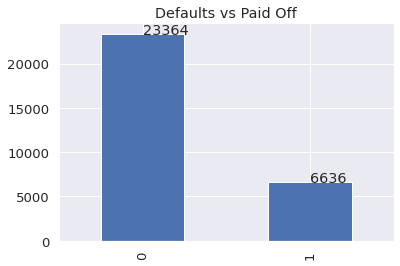

In [ ]:
#count of default 
df['default'].value_counts().plot.bar(color='B')
for v in [0, 1]:
    plt.text(v, (df.default == v).sum(), str((df.default == v).sum()));
#sns.barplot(x ='default', y='values', data=df)
plt.title('Defaults vs Paid Off')
#There are 6636 people who have defaulted and 22364 people who have paid off timely.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


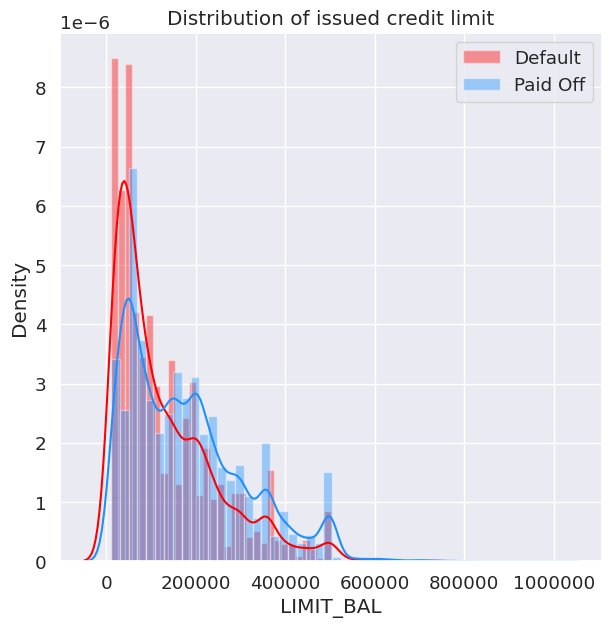

In [ ]:
#plot the distribution of credit limits issued 

plt.subplots(figsize=(7,7), dpi=100)
sns.distplot( df.loc[df.default==1, "LIMIT_BAL"] , color="red", label="Default")
sns.distplot( df.loc[df.default==0, "LIMIT_BAL"] , color="dodgerblue", label="Paid Off")
plt.ticklabel_format(style='plain', axis='x')
plt.title('Distribution of issued credit limit')
plt.legend();

In [ ]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

default      0     1
SEX                 
1         9015  2873
2        14349  3763


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/style.py:64: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  [conv.to_rgba(c) for c in colors]


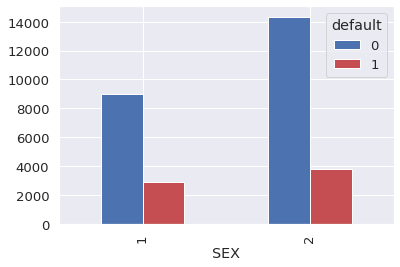

In [ ]:
#sex vs default
sex_default=pd.crosstab(index=df['SEX'],columns=df['default'])
print(sex_default)
 
# Grouped bar chart between GENDER and APPROVE_LOAN
sex_default.plot.bar(color='BR')


default        0     1
EDUCATION             
0             14     0
1           8549  2036
2          10700  3330
3           3680  1237
4            116     7
5            262    18
6             43     8


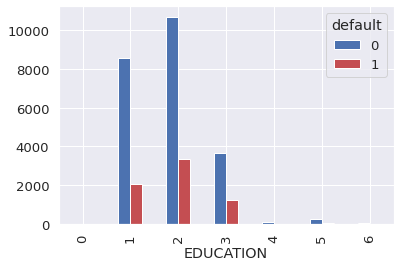

In [ ]:
#education vs default
education_default=pd.crosstab(index=df['EDUCATION'],columns=df['default'])
print(education_default)
 
# Grouped bar chart between GENDER and APPROVE_LOAN
education_default.plot.bar(color='BR')


default       0     1
MARRIAGE             
0            49     5
1         10453  3206
2         12623  3341
3           239    84


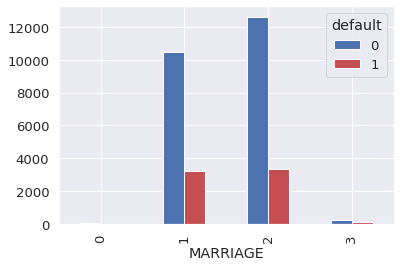

In [ ]:
#marriage vs default 
#sex vs default
marriage_default=pd.crosstab(index=df['MARRIAGE'],columns=df['default'])
print(marriage_default)
 
# Grouped bar chart between GENDER and APPROVE_LOAN
marriage_default.plot.bar(color='BR')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


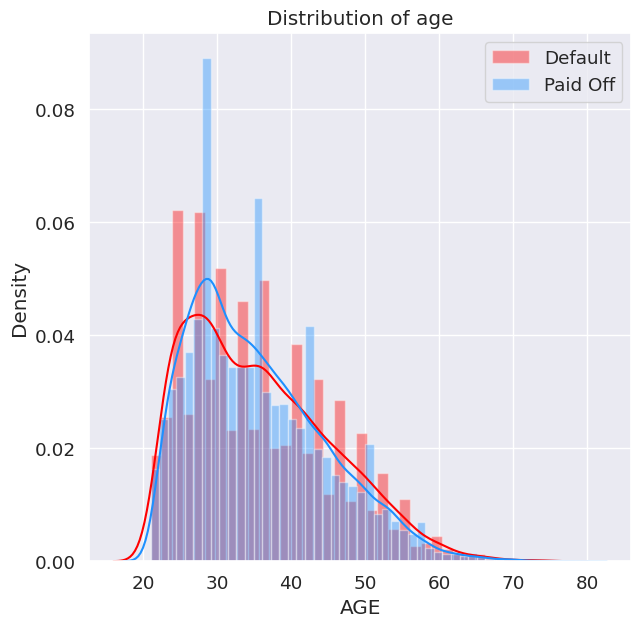

In [ ]:
#age vs default 
plt.subplots(figsize=(7,7), dpi=100)
sns.distplot( df.loc[df.default==1, "AGE"] , color="red", label="Default")
sns.distplot( df.loc[df.default==0, "AGE"] , color="dodgerblue", label="Paid Off")
plt.ticklabel_format(style='plain', axis='x')
plt.title('Distribution of age')
plt.legend();


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


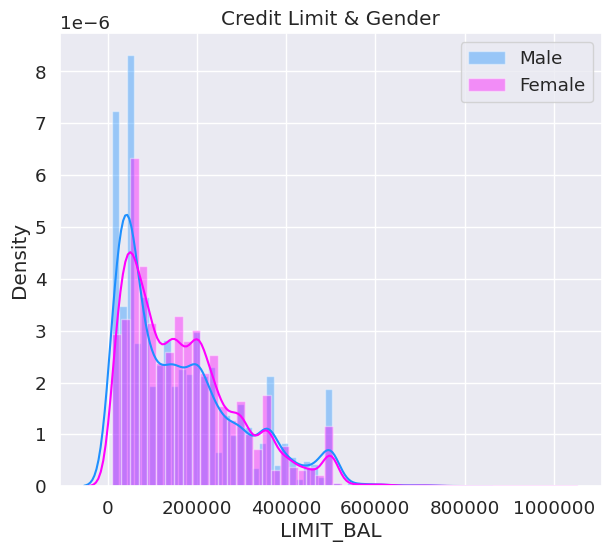

In [ ]:
#gender vs credit limit 

plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( df.loc[df.SEX==1, "LIMIT_BAL"] , color="dodgerblue", label="Male")
sns.distplot( df.loc[df.SEX==2, "LIMIT_BAL"] , color="magenta", label="Female")
plt.ticklabel_format(style='plain', axis='x')
plt.title('Credit Limit & Gender')
plt.legend();

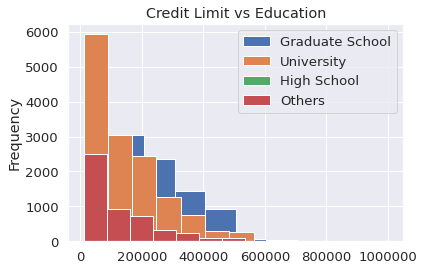

In [ ]:
#education vs credit limit 

x1 = df.loc[df.EDUCATION==0, 'LIMIT_BAL']
x2 = df.loc[df.EDUCATION==1, 'LIMIT_BAL']
x3 = df.loc[df.EDUCATION==2, 'LIMIT_BAL']
x4 = df.loc[df.EDUCATION==3, 'LIMIT_BAL']
x5 = df.loc[df.EDUCATION==4, 'LIMIT_BAL']
x6 = df.loc[df.EDUCATION==5, 'LIMIT_BAL']
x7 = df.loc[df.EDUCATION==6, 'LIMIT_BAL']

plt.hist(x2,label='Graduate School')
plt.hist(x3,label='University')
plt.hist(x4,label='High School')
plt.hist(x4,label='Others')
plt.gca().set(title='Credit Limit vs Education', ylabel='Frequency')
plt.ticklabel_format(style='plain', axis='x')
#plt.xlim(0,6)
plt.legend();

(array([5.127e+03, 8.261e+03, 6.514e+03, 4.812e+03, 2.606e+03, 1.836e+03,
        6.280e+02, 1.710e+02, 4.000e+01, 5.000e+00]),
 array([21. , 26.8, 32.6, 38.4, 44.2, 50. , 55.8, 61.6, 67.4, 73.2, 79. ]),
 <a list of 10 Patch objects>)

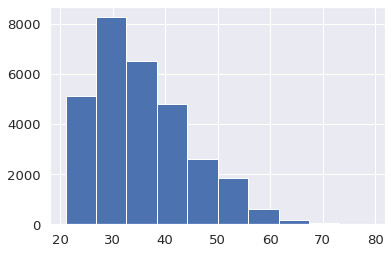

In [ ]:
#analyze the age variable - how to split into groups?
plt.hist(df['AGE'])


In [ ]:
bins = [20, 30, 40,80]
labels = ['<30', '>=30 & <40','40+']
df['agerange'] = pd.cut(df.AGE, bins, labels = labels,include_lowest = True)
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,agerange
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,<30
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,<30
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,>=30 & <40
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,>=30 & <40
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,40+


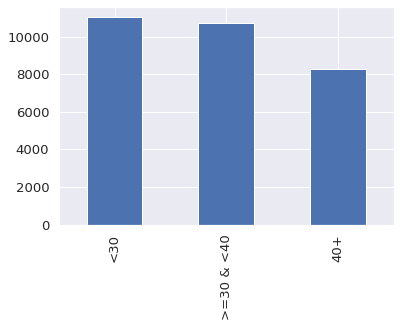

In [ ]:
#age_range_distribution
df['agerange'].value_counts().plot.bar(color='B')

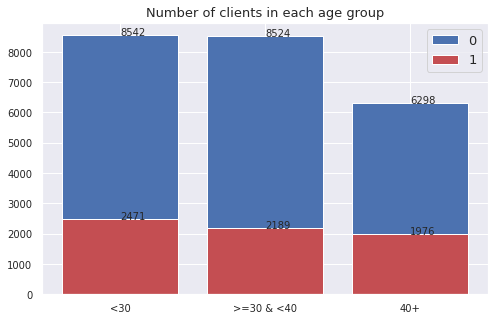

In [ ]:


age_cnt = df.agerange.value_counts()
age_0 = (df.agerange[df['default'] == 0].value_counts())
age_1 = (df.agerange[df['default'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data, x='AGE_BIN', y='LIMIT_BAL', hue='default', ci=0)
plt.bar(age_0.index, age_0.values, label='0',color='B')
plt.bar(age_1.index, age_1.values, label='1',color='R')
for x,y in zip(labels,age_0):
    plt.text(x,y,y,fontsize=10)
for x,y in zip(labels,age_1):
    plt.text(x,y,y,fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Number of clients in each age group", fontsize=13)
plt.legend(loc='upper right', fontsize=13)
plt.show()

default        0     1
agerange              
<30         8542  2471
>=30 & <40  8524  2189
40+         6298  1976


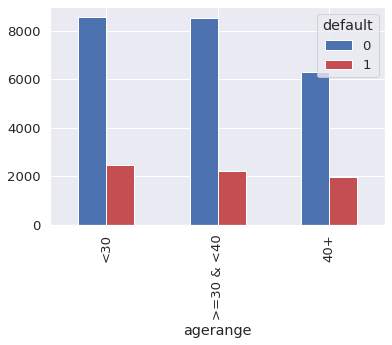

In [ ]:
#age range vs default
agerange_default=pd.crosstab(index=df['agerange'],columns=df['default'])
print(agerange_default)
 
# Grouped bar chart between GENDER and APPROVE_LOAN
agerange_default.plot.bar(color='BR')

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,agerange
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,<30
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,<30
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,>=30 & <40
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,>=30 & <40
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,40+


In [ ]:
#Education=1 is graduate school, 2 is university, 3 is high school and 4 is others.
#We also have 0, 5 and 6 in our dataset, which are not explicitly defined. so we group them into 4: others
df.loc[df['EDUCATION']==0, 'EDUCATION'] = 4
df.loc[df['EDUCATION']==5, 'EDUCATION'] = 4
df.loc[df['EDUCATION']==6, 'EDUCATION'] = 4
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,agerange
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,<30
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,<30
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,>=30 & <40
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,>=30 & <40
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,40+


In [ ]:
#combining 0 and 3 into 2 (Single)
df.loc[df['MARRIAGE']==0, 'MARRIAGE'] = 2
df.loc[df['MARRIAGE']==3, 'MARRIAGE'] = 2
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,agerange
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,<30
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,<30
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,>=30 & <40
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,>=30 & <40
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,40+


In [ ]:
#since PAY=-2,-1 and 0 means paid on time, let us group them into one category - Pay=0
df.loc[df['PAY_0']==-2, 'PAY_0'] = 0
df.loc[df['PAY_0']==-1, 'PAY_0'] = 0
df.loc[df['PAY_2']==-2, 'PAY_2'] = 0
df.loc[df['PAY_2']==-1, 'PAY_2'] = 0
df.loc[df['PAY_3']==-2, 'PAY_3'] = 0
df.loc[df['PAY_3']==-1, 'PAY_3'] = 0
df.loc[df['PAY_4']==-2, 'PAY_4'] = 0
df.loc[df['PAY_4']==-1, 'PAY_4'] = 0
df.loc[df['PAY_5']==-2, 'PAY_5'] = 0
df.loc[df['PAY_5']==-1, 'PAY_5'] = 0
df.loc[df['PAY_6']==-2, 'PAY_6'] = 0
df.loc[df['PAY_6']==-1, 'PAY_6'] = 0

#let us group the late payment variables into one - Pay_0=1
df.loc[df['PAY_0']==2, 'PAY_0'] = 1
df.loc[df['PAY_0']==3, 'PAY_0'] = 1
df.loc[df['PAY_0']==4, 'PAY_0'] = 1
df.loc[df['PAY_0']==5, 'PAY_0'] = 1
df.loc[df['PAY_0']==6, 'PAY_0'] = 1
df.loc[df['PAY_0']==7, 'PAY_0'] = 1
df.loc[df['PAY_0']==8, 'PAY_0'] = 1
df.loc[df['PAY_2']==2, 'PAY_2'] = 1
df.loc[df['PAY_2']==3, 'PAY_2'] = 1
df.loc[df['PAY_2']==4, 'PAY_2'] = 1
df.loc[df['PAY_2']==5, 'PAY_2'] = 1
df.loc[df['PAY_2']==6, 'PAY_2'] = 1
df.loc[df['PAY_2']==7, 'PAY_2'] = 1
df.loc[df['PAY_2']==8, 'PAY_2'] = 1
df.loc[df['PAY_3']==2, 'PAY_3'] = 1
df.loc[df['PAY_3']==3, 'PAY_3'] = 1
df.loc[df['PAY_3']==4, 'PAY_3'] = 1
df.loc[df['PAY_3']==5, 'PAY_3'] = 1
df.loc[df['PAY_3']==6, 'PAY_3'] = 1
df.loc[df['PAY_3']==7, 'PAY_3'] = 1
df.loc[df['PAY_3']==8, 'PAY_3'] = 1
df.loc[df['PAY_4']==2, 'PAY_4'] = 1
df.loc[df['PAY_4']==3, 'PAY_4'] = 1
df.loc[df['PAY_4']==4, 'PAY_4'] = 1
df.loc[df['PAY_4']==5, 'PAY_4'] = 1
df.loc[df['PAY_4']==6, 'PAY_4'] = 1
df.loc[df['PAY_4']==7, 'PAY_4'] = 1
df.loc[df['PAY_4']==8, 'PAY_4'] = 1
df.loc[df['PAY_5']==2, 'PAY_5'] = 1
df.loc[df['PAY_5']==3, 'PAY_5'] = 1
df.loc[df['PAY_5']==4, 'PAY_5'] = 1
df.loc[df['PAY_5']==5, 'PAY_5'] = 1
df.loc[df['PAY_5']==6, 'PAY_5'] = 1
df.loc[df['PAY_5']==7, 'PAY_5'] = 1
df.loc[df['PAY_5']==8, 'PAY_5'] = 1
df.loc[df['PAY_6']==2, 'PAY_6'] = 1
df.loc[df['PAY_6']==3, 'PAY_6'] = 1
df.loc[df['PAY_6']==4, 'PAY_6'] = 1
df.loc[df['PAY_6']==5, 'PAY_6'] = 1
df.loc[df['PAY_6']==6, 'PAY_6'] = 1
df.loc[df['PAY_6']==7, 'PAY_6'] = 1
df.loc[df['PAY_6']==8, 'PAY_6'] = 1
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,agerange
0,1,20000,2,2,1,24,1,1,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1,<30
1,2,120000,2,2,2,26,0,1,0,0,0,1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,<30
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,>=30 & <40
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,>=30 & <40
4,5,50000,1,2,1,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,40+


In [ ]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

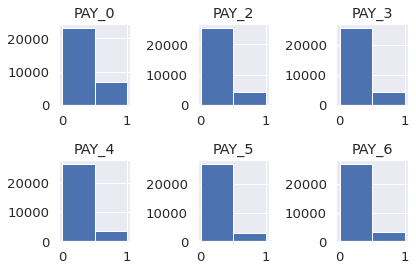

In [ ]:
pay = df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
draw_histograms(pay, pay.columns, 2, 3, 2)

In [ ]:
corr_test=df[[
              
              'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
              
corr_test=corr_test.corr()
corr_test.style.background_gradient(cmap ='coolwarm')

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
PAY_AMT1,1.000000,0.285576,0.252191,0.199558,0.148459,0.185735
PAY_AMT2,0.285576,1.000000,0.244770,0.180107,0.180908,0.157634
PAY_AMT3,0.252191,0.244770,1.000000,0.216325,0.159214,0.162740
PAY_AMT4,0.199558,0.180107,0.216325,1.000000,0.151830,0.157834
PAY_AMT5,0.148459,0.180908,0.159214,0.151830,1.000000,0.154896
PAY_AMT6,0.185735,0.157634,0.162740,0.157834,0.154896,1.000000


In [ ]:
#Feature Engineering - number of months of payment delays
df['payment_delay_months']=df['PAY_0']+df['PAY_2']+df['PAY_3']+df['PAY_4']+df['PAY_5']+df['PAY_6']
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,agerange,payment_delay_months
0,1,20000,2,2,1,24,1,1,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1,<30,2
1,2,120000,2,2,2,26,0,1,0,0,0,1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,<30,2
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,>=30 & <40,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,>=30 & <40,0
4,5,50000,1,2,1,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,40+,0


default                   0     1
payment_delay_months             
0                     17597  2334
1                      3106  1320
2                      1163   736
3                       567   587
4                       406   545
5                       127   171
6                       398   943


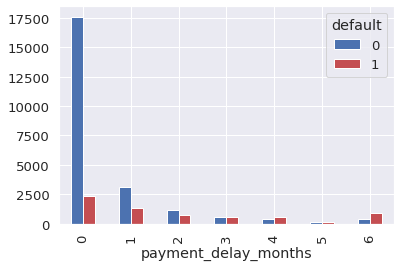

In [ ]:
#payment delay vs default
payment_delay_default=pd.crosstab(index=df['payment_delay_months'],columns=df['default'])
print(payment_delay_default)
 
# Grouped bar chart between GENDER and APPROVE_LOAN
payment_delay_default.plot.bar(color='BR')

In [ ]:
df['payment_delay_months'].describe()

count    30000.000000
mean         0.834200
std          1.554303
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: payment_delay_months, dtype: float64

In [ ]:
#Feature Engineering - credit line usage
df['credit_util1']=(df['BILL_AMT6'])/df['LIMIT_BAL']
df['credit_util2']=(df['BILL_AMT5'])/df['LIMIT_BAL']
df['credit_util3']=(df['BILL_AMT4'])/df['LIMIT_BAL']
df['credit_util4']=(df['BILL_AMT3'])/df['LIMIT_BAL']
df['credit_util5']=(df['BILL_AMT2'])/df['LIMIT_BAL']
df['credit_util6']=(df['BILL_AMT1'])/df['LIMIT_BAL']
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,agerange,payment_delay_months,credit_util1,credit_util2,credit_util3,credit_util4,credit_util5,credit_util6
0,1,20000,2,2,1,24,1,1,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1,<30,2,0.000000,0.000000,0.000000,0.034450,0.155100,0.195650
1,2,120000,2,2,2,26,0,1,0,0,0,1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,<30,2,0.027175,0.028792,0.027267,0.022350,0.014375,0.022350
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,>=30 & <40,0,0.172767,0.166089,0.159233,0.150656,0.155856,0.324878
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,>=30 & <40,0,0.590940,0.579180,0.566280,0.985820,0.964660,0.939800
4,5,50000,1,2,1,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,40+,0,0.382620,0.382920,0.418800,0.716700,0.113400,0.172340


In [ ]:
df['avg_credit_utilization']=(df['credit_util1']+df['credit_util2']+df['credit_util3']+df['credit_util4']+df['credit_util5']+df['credit_util6'])/6
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,agerange,payment_delay_months,credit_util1,credit_util2,credit_util3,credit_util4,credit_util5,credit_util6,avg_credit_utilization
0,1,20000,2,2,1,24,1,1,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1,<30,2,0.000000,0.000000,0.000000,0.034450,0.155100,0.195650,0.064200
1,2,120000,2,2,2,26,0,1,0,0,0,1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,<30,2,0.027175,0.028792,0.027267,0.022350,0.014375,0.022350,0.023718
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,>=30 & <40,0,0.172767,0.166089,0.159233,0.150656,0.155856,0.324878,0.188246
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,>=30 & <40,0,0.590940,0.579180,0.566280,0.985820,0.964660,0.939800,0.771113
4,5,50000,1,2,1,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,40+,0,0.382620,0.382920,0.418800,0.716700,0.113400,0.172340,0.364463


In [ ]:
df['avg_credit_utilization'].describe()

count    30000.000000
mean         0.373048
std          0.351890
min         -0.232590
25%          0.029997
50%          0.284834
75%          0.687929
max          5.364308
Name: avg_credit_utilization, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


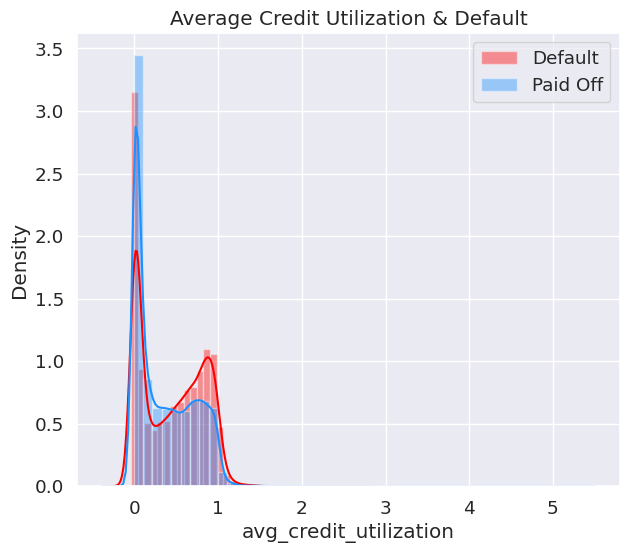

In [ ]:
#avg credit util

plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( df.loc[df.default==1, "avg_credit_utilization"] , color="red", label="Default")
sns.distplot( df.loc[df.default==0, "avg_credit_utilization"] , color="dodgerblue", label="Paid Off")
plt.ticklabel_format(style='plain', axis='x')
plt.title('Average Credit Utilization & Default')
plt.legend();

In [ ]:
df['paid_off']=(df['PAY_AMT1']+df['PAY_AMT2']+df['PAY_AMT3']+df['PAY_AMT4']+df['PAY_AMT5']+df['PAY_AMT6'])/(df['BILL_AMT1']+df['BILL_AMT2']+df['BILL_AMT3']+df['BILL_AMT4']+df['BILL_AMT5']+df['BILL_AMT6'])
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,agerange,payment_delay_months,credit_util1,credit_util2,credit_util3,credit_util4,credit_util5,credit_util6,avg_credit_utilization,paid_off
0,1,20000,2,2,1,24,1,1,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1,<30,2,0.000000,0.000000,0.000000,0.034450,0.155100,0.195650,0.064200,0.089434
1,2,120000,2,2,2,26,0,1,0,0,0,1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,<30,2,0.027175,0.028792,0.027267,0.022350,0.014375,0.022350,0.023718,0.292791
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,>=30 & <40,0,0.172767,0.166089,0.159233,0.150656,0.155856,0.324878,0.188246,0.108388
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,>=30 & <40,0,0.590940,0.579180,0.566280,0.985820,0.964660,0.939800,0.771113,0.036259
4,5,50000,1,2,1,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,40+,0,0.382620,0.382920,0.418800,0.716700,0.113400,0.172340,0.364463,0.540054


In [ ]:
import numpy as np
df['paid_off'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['paid_off']=df['paid_off'].fillna(0)
df['paid_off'].isnull().sum().sum()

0

In [ ]:
df['paid_off'].describe()

count    30000.000000
mean         0.380941
std          7.671004
min       -546.928571
25%          0.040952
50%          0.084932
75%          0.586922
max        797.000000
Name: paid_off, dtype: float64

In [ ]:
temp=df[['LIMIT_BAL','payment_delay_months','avg_credit_utilization']]
corr = temp.corr()
corr.style.background_gradient(cmap ='coolwarm')

,LIMIT_BAL,payment_delay_months,avg_credit_utilization
LIMIT_BAL,1.000000,-0.236763,-0.383366
payment_delay_months,-0.236763,1.000000,0.234377
avg_credit_utilization,-0.383366,0.234377,1.000000


In [ ]:
corr_test=df[['LIMIT_BAL','SEX','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',
              'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
              'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6',
              'default']]
corr_test=corr_test.corr()
corr_test.style.background_gradient(cmap ='coolwarm')


,LIMIT_BAL,SEX,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
LIMIT_BAL,1.000000,0.024755,-0.103701,-0.157742,-0.199823,-0.194145,-0.185079,-0.173792,-0.171731,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,-0.030463,-0.024760,-0.040957,-0.038157,-0.035218,-0.033982,-0.027597,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
MARRIAGE,-0.103701,-0.030463,1.000000,-0.015775,-0.010818,-0.000929,-0.006642,-0.003064,0.003059,-0.025264,-0.022429,-0.025946,-0.023149,-0.025019,-0.021169,-0.006964,-0.011291,-0.005339,-0.014581,-0.002195,-0.005974,-0.029775
PAY_0,-0.157742,-0.024760,-0.015775,1.000000,0.668176,0.430527,0.371030,0.348587,0.309867,-0.056238,-0.045264,-0.037456,-0.027913,-0.018041,-0.017178,-0.087731,-0.058995,-0.070151,-0.066843,-0.068260,-0.064219,0.368117
PAY_2,-0.199823,-0.040957,-0.010818,0.668176,1.000000,0.625247,0.478977,0.443047,0.397391,0.005936,0.009481,0.017775,0.027209,0.035196,0.037593,-0.099439,-0.052395,-0.060111,-0.053905,-0.050965,-0.044745,0.338022
PAY_3,-0.194145,-0.038157,-0.000929,0.430527,0.625247,1.000000,0.625660,0.482382,0.434247,-0.022620,-0.001617,0.001792,0.016869,0.026781,0.029806,-0.037844,-0.075793,-0.056923,-0.053084,-0.051506,-0.049673,0.293583
PAY_4,-0.185079,-0.035218,-0.006642,0.371030,0.478977,0.625660,1.000000,0.662637,0.496443,-0.020869,-0.007069,0.009373,0.022349,0.036032,0.042518,-0.054881,-0.037142,-0.077219,-0.054597,-0.053181,-0.048105,0.275495
PAY_5,-0.173792,-0.033982,-0.003064,0.348587,0.443047,0.482382,0.662637,1.000000,0.662683,-0.009427,0.001346,0.014253,0.037211,0.050441,0.057520,-0.054944,-0.040449,-0.036586,-0.068253,-0.051425,-0.045473,0.266959
PAY_6,-0.171731,-0.027597,0.003059,0.309867,0.397391,0.434247,0.496443,0.662683,1.000000,-0.009806,0.000711,0.012947,0.033636,0.056824,0.061106,-0.047700,-0.040584,-0.039689,-0.029021,-0.069364,-0.044015,0.246089
BILL_AMT1,0.285430,-0.033642,-0.025264,-0.056238,0.005936,-0.022620,-0.020869,-0.009427,-0.009806,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341,-0.019644


In [ ]:
corr_test=df[['LIMIT_BAL','SEX','MARRIAGE','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','avg_credit_utilization','payment_delay_months',
              'paid_off',
              'default']]
corr_test=corr_test.corr()
corr_test.style.background_gradient(cmap ='coolwarm')


,LIMIT_BAL,SEX,MARRIAGE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,avg_credit_utilization,payment_delay_months,paid_off,default
LIMIT_BAL,1.000000,0.024755,-0.103701,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.383366,-0.236763,0.030707,-0.153520
SEX,0.024755,1.000000,-0.030463,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.068845,-0.043760,0.004709,-0.039961
MARRIAGE,-0.103701,-0.030463,1.000000,-0.006964,-0.011291,-0.005339,-0.014581,-0.002195,-0.005974,0.045907,-0.008297,0.000247,-0.029775
PAY_AMT1,0.195236,-0.000242,-0.006964,1.000000,0.285576,0.252191,0.199558,0.148459,0.185735,0.044645,-0.086045,-0.017351,-0.072929
PAY_AMT2,0.178408,-0.001391,-0.011291,0.285576,1.000000,0.244770,0.180107,0.180908,0.157634,0.027077,-0.068192,0.004276,-0.058579
PAY_AMT3,0.210167,-0.008597,-0.005339,0.252191,0.244770,1.000000,0.216325,0.159214,0.162740,0.015516,-0.076115,0.002107,-0.056250
PAY_AMT4,0.203242,-0.002229,-0.014581,0.199558,0.180107,0.216325,1.000000,0.151830,0.157834,0.016647,-0.072270,0.003599,-0.056827
PAY_AMT5,0.217202,-0.001667,-0.002195,0.148459,0.180908,0.159214,0.151830,1.000000,0.154896,0.012572,-0.075979,0.008296,-0.055124
PAY_AMT6,0.219595,-0.002766,-0.005974,0.185735,0.157634,0.162740,0.157834,0.154896,1.000000,-0.007607,-0.065917,0.058759,-0.053183
avg_credit_utilization,-0.383366,-0.068845,0.045907,0.044645,0.027077,0.015516,0.016647,0.012572,-0.007607,1.000000,0.234377,-0.038241,0.115483


In [ ]:
df_baseline=pd.read_excel('/content/drive/Shareddrives/IDS575/dataset.xlsx')

df_baseline=df_baseline.rename(columns={"default payment next month": "default"})
df_baseline.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# Drop first column of dataframe
df_baseline = df_baseline.iloc[: , 1:]
df_baseline.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
target='default'
predictors=['LIMIT_BAL','SEX','EDUCATION','MARRIAGE', 'AGE', 
                'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [ ]:
from sklearn.model_selection import train_test_split
train_df,test_df = train_test_split(df_baseline, test_size=0.30, random_state=42,stratify=df_baseline['default'].values)

In [ ]:
#check that the target is not far off
print(df_baseline.default.describe())
print("---------------------------")
print(train_df.describe())
print("---------------------------")
print(test_df.describe())

count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default, dtype: float64
---------------------------
            LIMIT_BAL           SEX  ...       PAY_AMT6       default
count    21000.000000  21000.000000  ...   21000.000000  21000.000000
mean    167499.142857      1.603571  ...    5234.141429      0.221190
std     129767.049797      0.489167  ...   17650.268320      0.415058
min      10000.000000      1.000000  ...       0.000000      0.000000
25%      50000.000000      1.000000  ...     100.000000      0.000000
50%     140000.000000      2.000000  ...    1500.000000      0.000000
75%     240000.000000      2.000000  ...    4000.000000      0.000000
max    1000000.000000      2.000000  ...  527143.000000      1.000000

[8 rows x 24 columns]
---------------------------
           LIMIT_BAL          SEX  ...       PAY_AMT6      default
count    9000.0000

In [ ]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(train_df[predictors], train_df[target].values)
pred=dummy_clf.predict(test_df[predictors])
dummy_clf.score(test_df[predictors], test_df[target].values)


0.7787777777777778

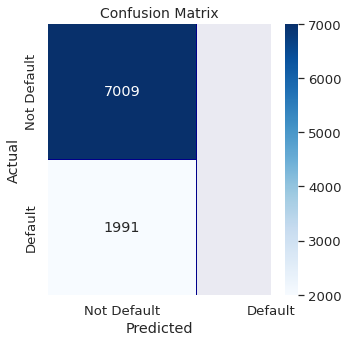

In [ ]:
cm = pd.crosstab(test_df[target].values, pred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues",fmt='')
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_df[target].values, pred)

0.5

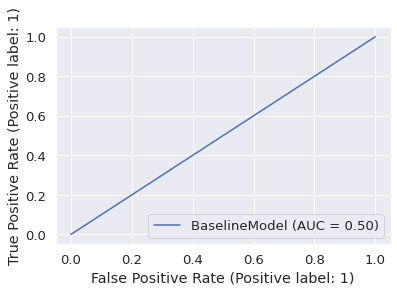

In [ ]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay
#fig=plot_roc_curve(dummy_clf,test_df[predictors],test_df[target]) 
fig_baseline_roc=RocCurveDisplay.from_predictions(test_df[target], pred,name='BaselineModel')
plt.show()

In [ ]:
df_main_pred=df[['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','agerange','payment_delay_months','avg_credit_utilization','paid_off','default']]
df_main_pred.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,agerange,payment_delay_months,avg_credit_utilization,paid_off,default
0,20000,2,2,1,<30,2,0.064200,0.089434,1
1,120000,2,2,2,<30,2,0.023718,0.292791,1
2,90000,2,2,2,>=30 & <40,0,0.188246,0.108388,0
3,50000,2,2,1,>=30 & <40,0,0.771113,0.036259,0
4,50000,1,2,1,40+,0,0.364463,0.540054,0


In [ ]:
#renaming the columns to make one-hot encoding easier
df_main_pred['SEX']=df_main_pred['SEX'].astype('string')
df_main_pred['SEX']=df_main_pred['SEX'].replace({'1': 'Male', '2': 'Female'})
df_main_pred['EDUCATION']=df_main_pred['EDUCATION'].astype('string')
df_main_pred['EDUCATION']=df_main_pred['EDUCATION'].replace({'1':'GraduateSchool','2':'University','3':'HighSchool','4':'Others'})
df_main_pred['MARRIAGE']=df_main_pred['MARRIAGE'].astype('string')
df_main_pred['MARRIAGE']=df_main_pred['MARRIAGE'].replace({'1': 'Married', '2': 'Single'})



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
#from sklearn import preprocessing
#from sklearn.preprocessing import StandardScaler
#from sklearn.utils import class_weight
#scaler = preprocessing.StandardScaler().fit(df_main_pred[['LIMIT_BAL','payment_delay_months','avg_credit_utilization','paid_off']]) #normalizing the features
#X_scaled = scaler.transform(df_main_pred[['LIMIT_BAL','payment_delay_months','avg_credit_utilization','paid_off']])

In [ ]:
#standardizing the numerical features
from sklearn.preprocessing import StandardScaler
scaled_features = df_main_pred.copy()
col_names = ['LIMIT_BAL', 'payment_delay_months','avg_credit_utilization','paid_off']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
print(scaled_features)

       LIMIT_BAL     SEX   EDUCATION  ... avg_credit_utilization  paid_off  default
0      -1.136720  Female  University  ...              -0.877698 -0.038002        1
1      -0.365981  Female  University  ...              -0.992741 -0.011491        1
2      -0.597202  Female  University  ...              -0.525178 -0.035531        0
3      -0.905498  Female  University  ...               1.131240 -0.044934        0
4      -0.905498    Male  University  ...              -0.024396  0.020743        0
...          ...     ...         ...  ...                    ...       ...      ...
29995   0.404759    Male  HighSchool  ...               0.501469 -0.042013        0
29996  -0.134759    Male  HighSchool  ...              -0.993260  0.039517        0
29997  -1.059646    Male  University  ...               0.052848  0.008220        1
29998  -0.674276    Male  HighSchool  ...               0.518329  0.022306        1
29999  -0.905498    Male  University  ...               1.126883 -0.044970  

In [ ]:

#df_main_pred['LIMIT_BAL'] = ((df_main_pred['LIMIT_BAL']-df_main_pred['LIMIT_BAL'].min())/(df_main_pred['LIMIT_BAL'].max()-df_main_pred['LIMIT_BAL'].min()))
#df_main_pred.head()

In [ ]:
#one hot encoding of categorical variables - SEX
# Get one hot encoding of columns B
one_hot = pd.get_dummies(scaled_features['SEX'])
# Drop column B as it is now encoded
scaled_features = scaled_features.drop('SEX',axis = 1)
# Join the encoded df
scaled_features = scaled_features.join(one_hot)

scaled_features.head()


,LIMIT_BAL,EDUCATION,MARRIAGE,agerange,payment_delay_months,avg_credit_utilization,paid_off,default,Female,Male
0,-1.136720,University,Married,<30,0.750059,-0.877698,-0.038002,1,1,0
1,-0.365981,University,Single,<30,0.750059,-0.992741,-0.011491,1,1,0
2,-0.597202,University,Single,>=30 & <40,-0.536713,-0.525178,-0.035531,0,1,0
3,-0.905498,University,Married,>=30 & <40,-0.536713,1.131240,-0.044934,0,1,0
4,-0.905498,University,Married,40+,-0.536713,-0.024396,0.020743,0,0,1


In [ ]:
#one hot encoding of categorical variables - EDUCATION
# Get one hot encoding of columns B
one_hot = pd.get_dummies(scaled_features['EDUCATION'])
# Drop column B as it is now encoded
scaled_features= scaled_features.drop('EDUCATION',axis = 1)
# Join the encoded df
scaled_features = scaled_features.join(one_hot)

scaled_features.head()

,LIMIT_BAL,MARRIAGE,agerange,payment_delay_months,avg_credit_utilization,paid_off,default,Female,Male,GraduateSchool,HighSchool,Others,University
0,-1.136720,Married,<30,0.750059,-0.877698,-0.038002,1,1,0,0,0,0,1
1,-0.365981,Single,<30,0.750059,-0.992741,-0.011491,1,1,0,0,0,0,1
2,-0.597202,Single,>=30 & <40,-0.536713,-0.525178,-0.035531,0,1,0,0,0,0,1
3,-0.905498,Married,>=30 & <40,-0.536713,1.131240,-0.044934,0,1,0,0,0,0,1
4,-0.905498,Married,40+,-0.536713,-0.024396,0.020743,0,0,1,0,0,0,1


In [ ]:
#one hot encoding of categorical variables - MARRIAGE
# Get one hot encoding of columns B
one_hot = pd.get_dummies(scaled_features['MARRIAGE'])
# Drop column B as it is now encoded
scaled_features = scaled_features.drop('MARRIAGE',axis = 1)
# Join the encoded df
scaled_features = scaled_features.join(one_hot)

scaled_features.head()

,LIMIT_BAL,agerange,payment_delay_months,avg_credit_utilization,paid_off,default,Female,Male,GraduateSchool,HighSchool,Others,University,Married,Single
0,-1.136720,<30,0.750059,-0.877698,-0.038002,1,1,0,0,0,0,1,1,0
1,-0.365981,<30,0.750059,-0.992741,-0.011491,1,1,0,0,0,0,1,0,1
2,-0.597202,>=30 & <40,-0.536713,-0.525178,-0.035531,0,1,0,0,0,0,1,0,1
3,-0.905498,>=30 & <40,-0.536713,1.131240,-0.044934,0,1,0,0,0,0,1,1,0
4,-0.905498,40+,-0.536713,-0.024396,0.020743,0,0,1,0,0,0,1,1,0


In [ ]:
#one hot encoding of categorical variables - agerange
# Get one hot encoding of columns B
one_hot = pd.get_dummies(scaled_features['agerange'])
# Drop column B as it is now encoded
scaled_features = scaled_features.drop('agerange',axis = 1)
# Join the encoded df
scaled_features = scaled_features.join(one_hot)

scaled_features.head()

,LIMIT_BAL,payment_delay_months,avg_credit_utilization,paid_off,default,Female,Male,GraduateSchool,HighSchool,Others,University,Married,Single,<30,>=30 & <40,40+
0,-1.136720,0.750059,-0.877698,-0.038002,1,1,0,0,0,0,1,1,0,1,0,0
1,-0.365981,0.750059,-0.992741,-0.011491,1,1,0,0,0,0,1,0,1,1,0,0
2,-0.597202,-0.536713,-0.525178,-0.035531,0,1,0,0,0,0,1,0,1,0,1,0
3,-0.905498,-0.536713,1.131240,-0.044934,0,1,0,0,0,0,1,1,0,0,1,0
4,-0.905498,-0.536713,-0.024396,0.020743,0,0,1,0,0,0,1,1,0,0,0,1


In [ ]:
import numpy as np
scaled_features.replace([np.inf, -np.inf], np.nan, inplace=True)
scaled_features=scaled_features.fillna(0)
scaled_features.isnull().sum().sum()

0

#KNN

In [ ]:
#BUILD KNN
#create a dataframe with all training data except the target column
X = scaled_features.drop(columns=['default'])
#check that the target variable has been removed
X.head()

,LIMIT_BAL,payment_delay_months,avg_credit_utilization,paid_off,Female,Male,GraduateSchool,HighSchool,Others,University,Married,Single,<30,>=30 & <40,40+
0,-1.136720,0.750059,-0.877698,-0.038002,1,0,0,0,0,1,1,0,1,0,0
1,-0.365981,0.750059,-0.992741,-0.011491,1,0,0,0,0,1,0,1,1,0,0
2,-0.597202,-0.536713,-0.525178,-0.035531,1,0,0,0,0,1,0,1,0,1,0
3,-0.905498,-0.536713,1.131240,-0.044934,1,0,0,0,0,1,1,0,0,1,0
4,-0.905498,-0.536713,-0.024396,0.020743,0,1,0,0,0,1,1,0,0,0,1


In [ ]:
#separate target values
y = scaled_features['default'].values
#view target values
y[0:5]

array([1, 1, 0, 0, 0], dtype=int64)

In [ ]:
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
#from sklearn import preprocessing
#from sklearn.preprocessing import StandardScaler
#from sklearn.utils import class_weight
#scaler = preprocessing.StandardScaler().fit(X_train) #normalizing the features
#X_scaled = scaler.transform(X_train)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 95) #used the best param
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=95)

In [ ]:
pred_knn=knn.predict(X_test)

In [ ]:
pred_trn=knn.predict(X_train)
knn.score(X_train,y_train)

0.805047619047619

In [ ]:
knn.score(X_test, y_test) #accuracy on test data

0.8055555555555556

In [ ]:
#cross val
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=154)
#train model with cv of 10
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.794      0.8025     0.79883333 0.80883333 0.8095    ]
cv_scores mean:0.8027333333333333


In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
#knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
#param_grid = {'n_neighbors': np.arange(1, 175)}
#use gridsearch to test all values for n_neighbors
#knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
#knn_gscv.fit(X, y)

In [ ]:
#check top performing n_neighbors value
#knn_gscv.best_params_

In [ ]:
#check mean score for the top performing value of n_neighbors
#knn_gscv.best_score_

In [ ]:
#acc = []
# Will take some time
#from sklearn import metrics
#for i in range(1,175):
 #   neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
  #  yhat = neigh.predict(X_test)
   # acc.append(metrics.accuracy_score(y_test, yhat))
    


In [ ]:
#plt.figure(figsize=(10,5))
#plt.plot(range(1,175),acc,color = 'blue',linestyle='dashed', 
      #   marker='o',markerfacecolor='red', markersize=10)
#plt.title('accuracy vs. K Value')
#plt.xlabel('K')
#plt.ylabel('Accuracy')
#print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [ ]:
cm_knn = pd.crosstab(y_test, pred_knn, rownames=['Actual'], colnames=['Predicted']) #generating confusion matrix
cm_knn


Predicted,0,1
Actual,,
0,6671,338
1,1412,579


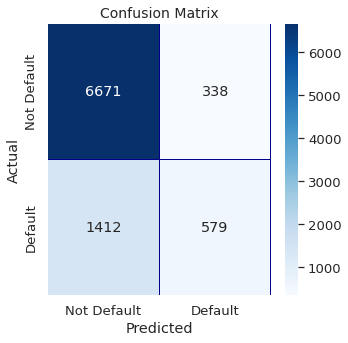

In [ ]:
#plotting confusion matrix
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm_knn, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues",fmt='')
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_knn)) #classification report

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      7009
           1       0.63      0.29      0.40      1991

    accuracy                           0.81      9000
   macro avg       0.73      0.62      0.64      9000
weighted avg       0.78      0.81      0.78      9000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


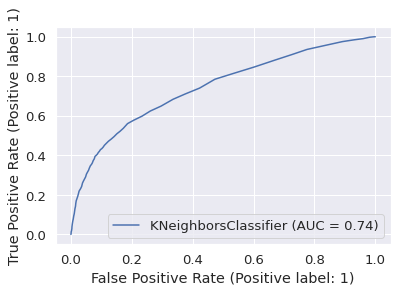

In [ ]:
fig_knn_roc=plot_roc_curve(knn, X_test, y_test) #ROC Curve
plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


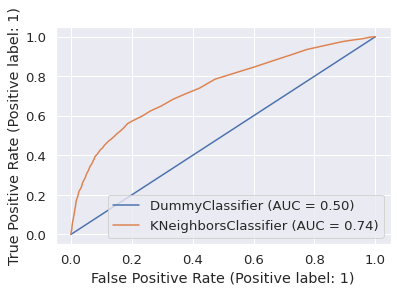

In [ ]:
classifiers = [dummy_clf, knn]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)
   

In [ ]:
#Trying oversampling
from imblearn.over_sampling import SMOTE
smote_algo=SMOTE(random_state=0)
X_SMOTE, y_SMOTE = smote_algo.fit_resample(X_train, y_train)

In [ ]:
# Create KNN classifier
knn_SMOTE = KNeighborsClassifier(n_neighbors = 95).fit(X_SMOTE,y_SMOTE)#used the best param


In [ ]:
pred_knn_SMOTE=knn_SMOTE.predict(X_test)

In [ ]:
knn_SMOTE.score(X_test, y_test)

0.7224444444444444

In [ ]:
print(classification_report(y_test,pred_knn_SMOTE))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      7009
           1       0.41      0.60      0.49      1991

    accuracy                           0.72      9000
   macro avg       0.64      0.68      0.65      9000
weighted avg       0.77      0.72      0.74      9000



In [ ]:
cm_knn_SMOTE = pd.crosstab(y_test, pred_knn_SMOTE, rownames=['Actual'], colnames=['Predicted'])
cm_knn_SMOTE

Predicted,0,1
Actual,,
0,5317,1692
1,806,1185


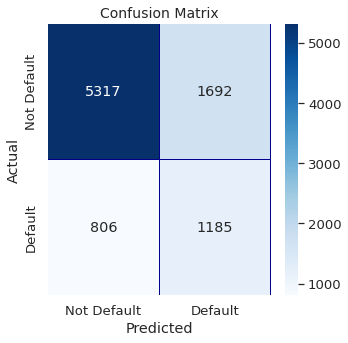

In [ ]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm_knn_SMOTE, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues",fmt='')
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [ ]:
roc_auc_score(y_test, pred_knn_SMOTE)

0.6768871965505497

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


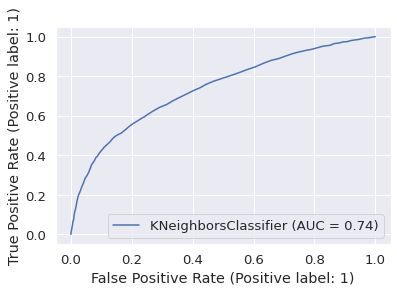

In [ ]:
fig_knn_SMOTE=plot_roc_curve(knn_SMOTE, X_test, y_test) 
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


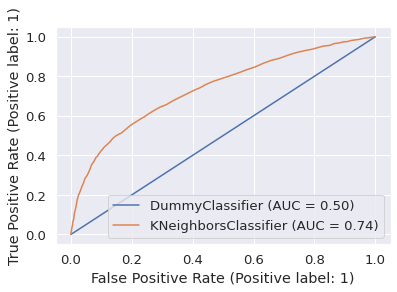

In [ ]:
classifiers = [dummy_clf, knn_SMOTE]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)

#Naive Bayes

In [ ]:
pip install git+https://github.com/remykarem/mixed-naive-bayes#egg=mixed_naive_bayes


  Cloning https://github.com/remykarem/mixed-naive-bayes to /tmp/pip-install-m5msh79q/mixed-naive-bayes_43b69b5e388942d8bd4b3b3ad5437b33
  Running command git clone -q https://github.com/remykarem/mixed-naive-bayes /tmp/pip-install-m5msh79q/mixed-naive-bayes_43b69b5e388942d8bd4b3b3ad5437b33
  Created wheel for mixed-naive-bayes: filename=mixed_naive_bayes-0.0.2-py3-none-any.whl size=11250 sha256=0d38471a196bfaa42bff80d0671a7b3bf97b8141dd8ce01bf21088091fc744af
  Stored in directory: /tmp/pip-ephem-wheel-cache-0wlurcux/wheels/f6/17/45/08ff7102e1201fe077c968291143479ecc63186e638bcce9f3
Successfully built mixed-naive-bayes


In [ ]:
from mixed_naive_bayes import MixedNB
clf_mixed_nb = MixedNB(categorical_features=[4,5,6,7,8,9,10,11,12,13,14])
pred_mixed_nb=clf_mixed_nb.fit(X_train,y_train).predict(X_test)
clf_mixed_nb.score(X_test,y_test)



0.8047777777777778

In [ ]:
cm_mixed_nb= pd.crosstab(y_test, pred_mixed_nb, rownames=['Actual'], colnames=['Predicted'])
cm_mixed_nb

Predicted,0,1
Actual,,
0,6548,461
1,1296,695


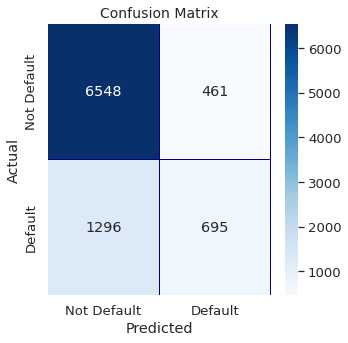

In [ ]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm_mixed_nb, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues",fmt='')
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [ ]:
print(classification_report(y_test,pred_mixed_nb))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      7009
           1       0.60      0.35      0.44      1991

    accuracy                           0.80      9000
   macro avg       0.72      0.64      0.66      9000
weighted avg       0.78      0.80      0.78      9000



In [ ]:
fig_gnb_roc=plot_roc_curve(nb, X_test, y_test) 
plt.show()


#The first classifier is built without smoothing/oversampling

In [ ]:
#building the classifier 
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
pred_gnb = gnb.fit(X_train, y_train).predict(X_test)
gnb.score(X_test,y_test)


0.8

In [ ]:
cm_gnb= pd.crosstab(y_test, pred_gnb, rownames=['Actual'], colnames=['Predicted'])
cm_gnb

Predicted,0,1
Actual,,
0,6398,611
1,1189,802


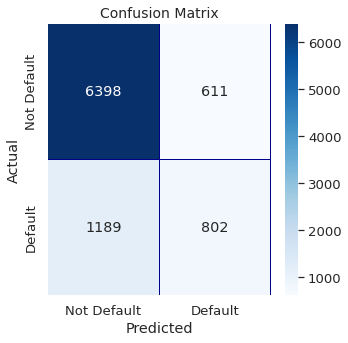

In [ ]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm_gnb, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues",fmt='')
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [ ]:
roc_auc_score(y_test, pred_gnb)

0.6578195115285155

In [ ]:
print(classification_report(y_test,pred_gnb))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      7009
           1       0.57      0.40      0.47      1991

    accuracy                           0.80      9000
   macro avg       0.71      0.66      0.67      9000
weighted avg       0.78      0.80      0.79      9000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


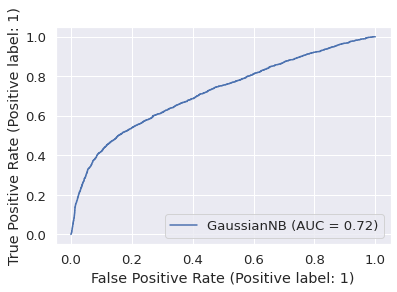

In [ ]:
fig_gnb_roc=plot_roc_curve(gnb, X_test, y_test) 
plt.show()


#No sampling - laplace smoothing

In [ ]:
# Splitting the training data into 75% for training and 25% for validation
from sklearn.model_selection import train_test_split
X_train_c, X_val_c, y_train_c, y_val_c = train_test_split(X_train, y_train, test_size=0.25,random_state=42,stratify=y_train)

In [ ]:
#accuracy=[]
#for C in (0.0001,0.001,0.01,0.1,1,10,100,1000):
  #gnb_smooth = GaussianNB(var_smoothing=C)
  #pred_gnb_smooth = gnb_smooth.fit(X_train_c, y_train_c).predict(X_val_c)
  #score=gnb_smooth.score(X_val_c,y_val_c)
  #accuracy.append(score)
  #print("Score for", C, "=", score) 




In [ ]:
gnb_smooth = GaussianNB(var_smoothing=0.00001) #with best value
pred_gnb_smooth = gnb_smooth.fit(X_train, y_train).predict(X_test)
gnb_smooth.score(X_test,y_test)

0.8

In [ ]:
cm_gnb_smooth = pd.crosstab(y_test, pred_gnb_smooth, rownames=['Actual'], colnames=['Predicted'])
cm_gnb_smooth

Predicted,0,1
Actual,,
0,6398,611
1,1189,802


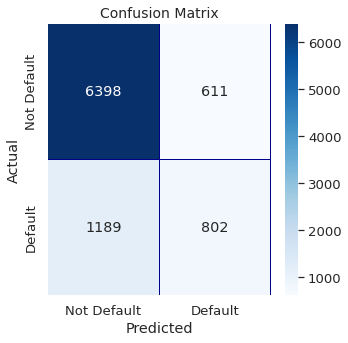

In [ ]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm_gnb_smooth, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues",fmt='')
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [ ]:
roc_auc_score(y_test, pred_gnb_smooth)

0.6578195115285155

In [ ]:
print(classification_report(y_test,pred_gnb_smooth))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      7009
           1       0.57      0.40      0.47      1991

    accuracy                           0.80      9000
   macro avg       0.71      0.66      0.67      9000
weighted avg       0.78      0.80      0.79      9000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


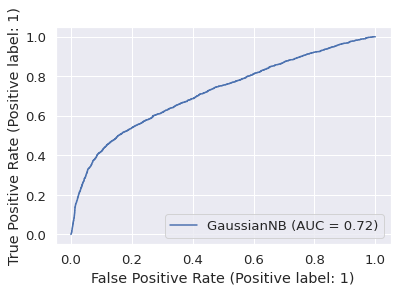

In [ ]:
fig_gnb_smooth_roc=plot_roc_curve(gnb_smooth, X_test, y_test) 
plt.show()


#with oversampling and laplace smoothing

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# Creating the OverSampled data
X_resampled, y_resampled = RandomOverSampler(random_state=69).fit_resample(X_train, y_train)
gnb_oversampling = GaussianNB(var_smoothing=0.01)
pred_gnb_oversample = gnb_oversampling.fit(X_SMOTE,y_SMOTE).predict(X_test)
gnb_oversampling.score(X_test,y_test)

0.5961111111111111

In [ ]:
cm_gnb_oversample= pd.crosstab(y_test, pred_gnb_oversample, rownames=['Actual'], colnames=['Predicted'])
cm_gnb_oversample

Predicted,0,1
Actual,,
0,3931,3078
1,557,1434


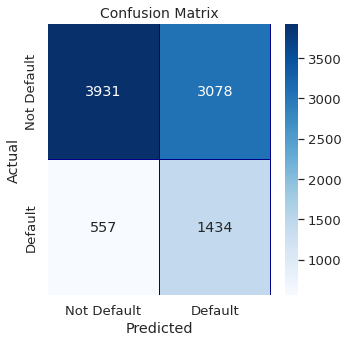

In [ ]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm_gnb_oversample, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues",fmt='')
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [ ]:
roc_auc_score(y_test, pred_gnb_oversample)

0.640545710082588

In [ ]:
print(classification_report(y_test,pred_gnb_oversample))

              precision    recall  f1-score   support

           0       0.88      0.56      0.68      7009
           1       0.32      0.72      0.44      1991

    accuracy                           0.60      9000
   macro avg       0.60      0.64      0.56      9000
weighted avg       0.75      0.60      0.63      9000



In [ ]:
#cross val
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
import numpy as np
#create a new NB model
#cv_gnb = GaussianNB(var_smoothing=0.01)
#train model with cv of 10
#cv_scores = cross_val_score(cv_gnb, X_resampled, y_resampled, cv=10)
#print each cv score (accuracy) and average them
#print(cv_scores)
#print('cv_scores mean:{}'.format(np.mean(cv_scores)))
#predictions = cross_val_predict(cv_gnb,X_test, y_test, cv=10)
#accuracy = f1_score(y_test, predictions)
#print ("Cross-Predicted Accuracy:", accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


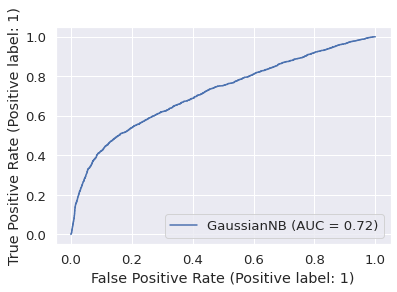

In [ ]:
fig=plot_roc_curve(gnb_oversampling, X_test, y_test) 
plt.show()


#SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import statistics

svm = SVC(kernel='rbf',C=1,gamma=0.1)
pred_svm=svm.fit(X_train,y_train).predict(X_test)
svm.score(X_test,y_test)

0.8065555555555556

In [ ]:
cm_svm = pd.crosstab(y_test, pred_svm, rownames=['Actual'], colnames=['Predicted'])
cm_svm

Predicted,0,1
Actual,,
0,6689,320
1,1421,570


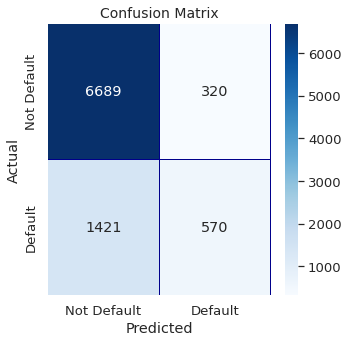

In [ ]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm_svm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues",fmt='')
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7009
           1       0.64      0.29      0.40      1991

    accuracy                           0.81      9000
   macro avg       0.73      0.62      0.64      9000
weighted avg       0.78      0.81      0.78      9000



In [ ]:
roc_auc_score(y_test, pred_gnb)

0.6587074779867944

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


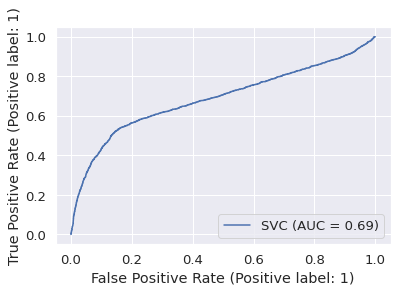

In [ ]:
fig=plot_roc_curve(svm, X_test, y_test) 
plt.show()


#SVM-with SMOTE

In [ ]:

svm_SMOTE= SVC(kernel='linear',C=4)
pred_svm_SMOTE=svm_SMOTE.fit(X_SMOTE,y_SMOTE).predict(X_test)
svm_SMOTE.score(X_test,y_test)

0.7915555555555556

In [ ]:
svm_SMOTE.coef_

array([[-8.36095055e-05,  1.03613176e+00,  3.49219558e-05,
        -5.83172831e-05, -2.00017889e+00, -2.00015353e+00,
        -2.00016675e+00, -2.00023942e+00, -2.00058803e+00,
        -2.00003565e+00, -2.00005876e+00, -2.00001028e+00,
        -2.00013917e+00, -2.00002557e+00, -2.00004381e+00]])

In [ ]:

svm_SMOTE_rbf= SVC(kernel='rbf',C=1,gamma=0.1)
pred_svm_SMOTE=svm_SMOTE_rbf.fit(X_SMOTE,y_SMOTE).predict(X_test)
svm_SMOTE_rbf.score(X_test,y_test)

0.7342222222222222

In [ ]:
cm_svm_SMOTE = pd.crosstab(y_test, pred_svm_SMOTE, rownames=['Actual'], colnames=['Predicted'])
cm_svm_SMOTE

Predicted,0,1
Actual,,
0,5324,1685
1,707,1284


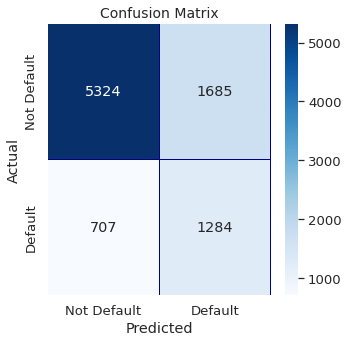

In [ ]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm_svm_SMOTE, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues",fmt='')
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [ ]:
print(classification_report(y_test,pred_svm_SMOTE))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      7009
           1       0.43      0.64      0.52      1991

    accuracy                           0.73      9000
   macro avg       0.66      0.70      0.67      9000
weighted avg       0.78      0.73      0.75      9000



In [ ]:
roc_auc_score(y_test, pred_svm_SMOTE)

0.7022484329719147

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


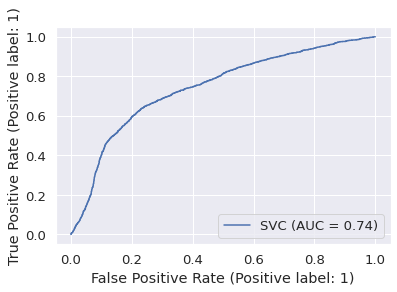

In [ ]:
fig=plot_roc_curve(svm_SMOTE_rbf, X_test, y_test) 
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


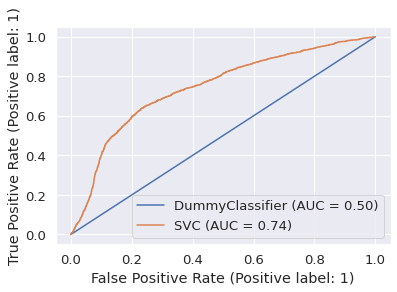

In [ ]:
classifiers = [dummy_clf,svm_SMOTE_rbf]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)

#Trying soft margin svm 

In [ ]:
#Splitting the training data into 75% for training and 25% for validation
#from sklearn.model_selection import train_test_split
#X_train_c, X_val_c, y_train_c, y_val_c = train_test_split(X_SMOTE,y_SMOTE, test_size=0.25,random_state=42,stratify=y_SMOTE)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import statistics
test_error1=[]
#for C in (0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512):
 # model1 = SVC(kernel='linear',C=C)
 # model1.fit(X_train_c,y_train_c)
 # y1_pred_test_c=model1.predict(X_val_c)
 # val_err1=1-accuracy_score(y_val_c,y1_pred_test_c)
 # test_error1.append(val_err1)
 # print("Overall classification error for", C, "=", (val_err1)) 

In [ ]:
# plotting both the training and validation errors together
#C_values= np.array([0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512])
#Log_C_values = np.log2(C_values)

import matplotlib.pyplot as plt
#fig, errorplots = plt.subplots()


#errorplots.plot(Log_C_values,test_error1)     
  
 

#errorplots.set_ylabel('Error Rate')
#errorplots.set_xlabel('Log2(C)')
#errorplots.legend(bbox_to_anchor=(1.1, 1.05))
#errorplots.set_title('Error Rate vs Log2(C)')


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import statistics
#test_error1=[]
#for C in (0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64):
  #for gamma in(0.01,0.1,1,10,100):
    #model1 = SVC(kernel='rbf',C=C,gamma=gamma)
    #model1.fit(X_train_c,y_train_c)
    #y1_pred_test_c=model1.predict(X_val_c)
    #val_err1=1-accuracy_score(y_val_c,y1_pred_test_c)
    #test_error1.append(val_err1)
    #print("Overall classification error for C =", C, "and gamma = ",gamma,"=", (val_err1)) 

In [ ]:
#pip install sklearn.cross_validation

#SGD

In [ ]:
#Splitting the training data into 75% for training and 25% for validation
#from sklearn.model_selection import train_test_split
#X_train_c_new, X_val_c_new, y_train_c_new, y_val_c_new = train_test_split(X_train, y_train, test_size=0.25,random_state=42,stratify=y_train)

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier

In [ ]:
#def cv_plot(alpha, cv_auc):
    
    #fig, ax = plt.subplots()
    #ax.plot(np.log10(alpha), cv_auc,c='g')
    #plt.grid()
    #plt.xticks(np.log10(alpha),rotation=90)
    #plt.title("Cross Validation Error for each alpha")
    #plt.xlabel("Alpha i's")
   # plt.ylabel("Error measure")
   # plt.show()

from sklearn.calibration import CalibratedClassifierCV
#alpha = np.logspace(-8,2,10)
#cv_auc_score = []
#for i in alpha:
    #clf = SGDClassifier(alpha=i, penalty='l1',class_weight = 'balanced', loss='log', random_state=28)
    #clf.fit(X_train_c_new, y_train_c_new)
    #sig_clf = CalibratedClassifierCV(clf, method='sigmoid')
    #sig_clf.fit(X_train_c_new, y_train_c_new)
    #y_pred_prob = sig_clf.predict_proba(X_val_c_new)[:,1]
    #cv_auc_score.append(roc_auc_score(y_val_c_new,y_pred_prob))
    #print('For alpha {0}, cross validation AUC score {1}'.format(i,roc_auc_score(y_val_c_new,y_pred_prob)))
#cv_plot(alpha, cv_auc_score)
#print('The Optimal C value is:', alpha[np.argmax(cv_auc_score)])

In [ ]:
#best_alpha = alpha[np.argmax(cv_auc_score)]
#logreg = SGDClassifier(alpha = best_alpha,class_weight='balanced',penalty = 'l2', loss='log', random_state = 28)
#logreg.fit(X_train, y_train)
#logreg_sig_clf = CalibratedClassifierCV(logreg, method='sigmoid')
#logreg_sig_clf.fit(X_train, y_train)
#y_pred_prob = logreg_sig_clf.predict_proba(X_train)[:,1]
#print('For best alpha {0}, The Train AUC score is {1}'.format(best_alpha, roc_auc_score(y_train,y_pred_prob) ))    
#y_pred_prob = logreg_sig_clf.predict_proba(X_test)[:,1]
#print('For best alpha {0}, The Cross validated AUC score is {1}'.format(best_alpha, roc_auc_score(y_test,y_pred_prob) ))  
#y_pred_prob = logreg_sig_clf.predict_proba(X_test)[:,1]
#print('For best alpha {0}, The Test AUC score is {1}'.format(best_alpha, roc_auc_score(y_test,y_pred_prob) ))
#y_pred = logreg.predict(X_test)
#print('The test AUC score is :', roc_auc_score(y_test,y_pred_prob))
#print('The percentage of misclassified points {:05.2f}% :'.format((1-accuracy_score(y_test, y_pred))*100))
#plot_confusion_matrix(y_test, y_pred)

In [ ]:
#cm_sgd = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']) #generating confusion matrix
#cm_sgd

In [ ]:
#fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
#sns.heatmap(cm_sgd, 
           # xticklabels=['Not Default', 'Default'],
           # yticklabels=['Not Default', 'Default'],
           # annot=True,ax=ax1,
           # linewidths=.2,linecolor="Darkblue", cmap="Blues",fmt='')
#plt.title('Confusion Matrix', fontsize=14)
#plt.show()

In [ ]:
#print(classification_report(y_test,y_pred))

In [ ]:
#fig=plot_roc_curve(logreg_sig_clf, X_test, y_test) 
#plt.show()

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
c_val = [0.001,0.01,0.1,0.5,1.0]

logreg = LogisticRegression(solver = 'liblinear',penalty='l2',class_weight='balanced')
hyperParam = [{'C':c_val}]

log_regssion = GridSearchCV(logreg,hyperParam,cv=5,verbose=1)
best_model = log_regssion.fit(X_train, y_train)                       
logreg_pred_mms = best_model.best_estimator_.predict(X_test) 

print("Best HyperParameter: ",log_regssion.best_params_)
print("Best Accuracy :",best_model.score(X_test, y_test))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best HyperParameter:  {'C': 0.001}
Best Accuracy : 0.7704444444444445


In [ ]:
print(classification_report(y_test,logreg_pred_mms))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      7009
           1       0.48      0.56      0.52      1991

    accuracy                           0.77      9000
   macro avg       0.68      0.69      0.68      9000
weighted avg       0.78      0.77      0.78      9000



In [ ]:
cm_lr = pd.crosstab(y_test, logreg_pred_mms, rownames=['Actual'], colnames=['Predicted']) #generating confusion matrix
cm_lr

Predicted,0,1
Actual,,
0,5827,1182
1,884,1107


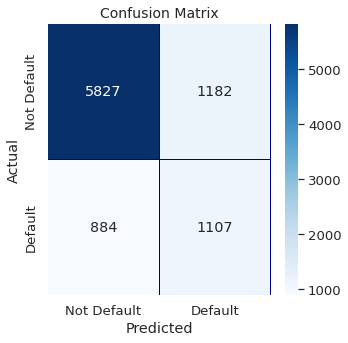

In [ ]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm_lr, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues",fmt='')
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
c_val = [0.001,0.01,0.1,0.5,1.0]

logreg = LogisticRegression(solver='liblinear',penalty='l2',C=0.001) #using the best hyperparameter
hyperParam = [{'C':c_val}]

#log_regssion = GridSearchCV(logreg,hyperParam,cv=5,verbose=1)
best_model = logreg.fit(X_SMOTE, y_SMOTE)                       
logreg_pred_mms = logreg.predict(X_test) 

print("Best HyperParameter: ",log_regssion.best_params_)
print("Best Accuracy :",best_model.score(X_test, y_test))

Best HyperParameter:  {'C': 0.001}
Best Accuracy : 0.7686666666666667


In [ ]:
cm_lr = pd.crosstab(y_test, logreg_pred_mms, rownames=['Actual'], colnames=['Predicted']) #generating confusion matrix
cm_lr

Predicted,0,1
Actual,,
0,5812,1197
1,885,1106


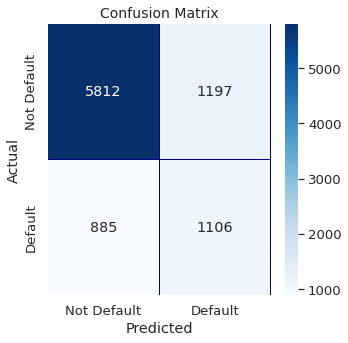

In [ ]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm_lr, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues",fmt='')
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [ ]:
print(classification_report(y_test,logreg_pred_mms))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      7009
           1       0.48      0.56      0.52      1991

    accuracy                           0.77      9000
   macro avg       0.67      0.69      0.68      9000
weighted avg       0.78      0.77      0.77      9000



In [ ]:
best_model.coef_

array([[-0.23017935,  0.69127003,  0.00495227, -0.01417082, -0.08882728,
         0.04109892,  0.00822086, -0.00583991, -0.08737337, -0.00984318,
         0.03409858, -0.09219879, -0.05382597, -0.06237359,  0.04888701]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


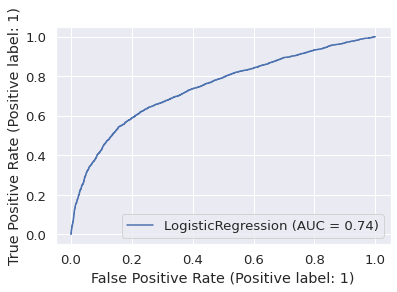

In [ ]:
fig=plot_roc_curve(best_model, X_test, y_test) 
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

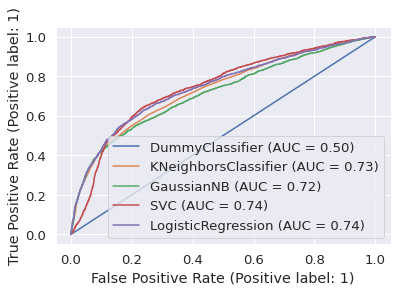

In [ ]:
classifiers = [dummy_clf,knn_SMOTE,gnb_oversampling,svm_SMOTE_rbf,logreg]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)